In [22]:
# noinspection PyUnresolvedReferences
# noinspection PyUnresolvedReferences
# from ipynb.fs.full.preparation import expanded_df, expanded_df2

In [23]:
# noinspection PyUnresolvedReferences
from ipynb.fs.full.full_data_5 import full_scale_df_5 as full_scale_df

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression

from decmon.learning import *

## Classification

We drop columns that are not numeric (and in our case, present in the dataset in other forms)

In [25]:
cols_to_drop = ['formula', 'trace', 'strategy']

In [26]:
TARGET = 'strategy_id'
N_CLASSES = 3 # orchestration, migration, choreography

In [27]:
final_df = clean_df(full_scale_df, cols_to_drop)

In [28]:
X_train, X_test, y_train, y_test = prepare_learning_sets(final_df, TARGET)

### K-Neighbours Classifier

In [29]:
# K Neighbors Classifier
kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
kn_classifier.fit(X_train, y_train)

kn_classifier.score(X_test, y_test)

#y_pred = kn_classifier.predict(X_test)
#y_pred

0.9377422901116704

In [30]:
final_full_df = clean_df(full_scale_df, cols_to_drop)
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, TARGET)

kn_classifier = KNeighborsClassifier(n_neighbors=N_CLASSES)
classifier = kn_classifier.fit(f_X_train, f_y_train)

mean_accuracy = classifier.score(f_X_test, f_y_test)
mean_accuracy

0.9377422901116704

In [31]:
pred_y = classifier.predict(f_X_test)
f1_score(pred_y, f_y_test, average=None)

array([0.90597617, 0.95594468, 0.95080824])

## Regression

In [32]:
final_full_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,379,380,381,382,383,384,385,386,387,388
0,0,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,5,1.00,4,12,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,10,1.00,6,12,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,5,1.00,3,11,-3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,5196,6,23,192,18.00,28963,10,13,12,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15599,5197,6,18,169,19.54,2148,4,5,4,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15600,5198,6,18,17,1.97,105,11,13,5,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,5199,6,59,634,25.80,5469,13,5,4,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression - Progressions

In [33]:
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'nb_progressions')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)


-131.74046919176251

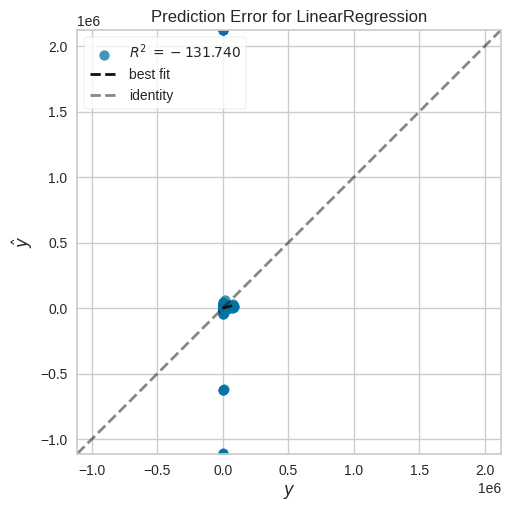

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [34]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


# sns.regplot(x="total_bill", y="tip", data=tips);

### SVM

In [35]:
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)

### Neural networks (MLPRegressor)

In [36]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)

/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.537035882718832

In [37]:
final_full_df


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,379,380,381,382,383,384,385,386,387,388
0,0,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,5,1.00,4,12,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,10,1.00,6,12,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,5,1.00,3,11,-3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,5196,6,23,192,18.00,28963,10,13,12,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15599,5197,6,18,169,19.54,2148,4,5,4,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15600,5198,6,18,17,1.97,105,11,13,5,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,5199,6,59,634,25.80,5469,13,5,4,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


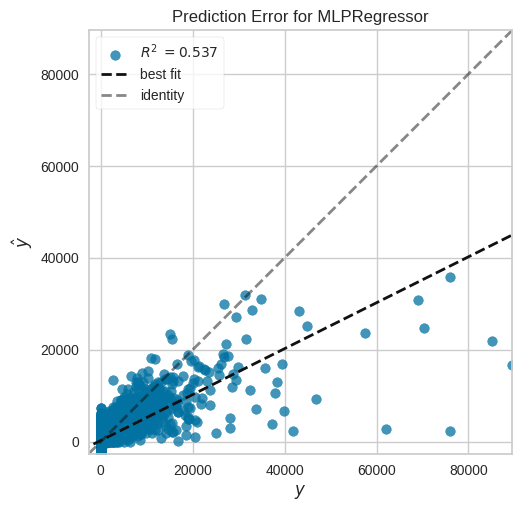

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [39]:
### Linear Regression - N. messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'num_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-44.18425445934079

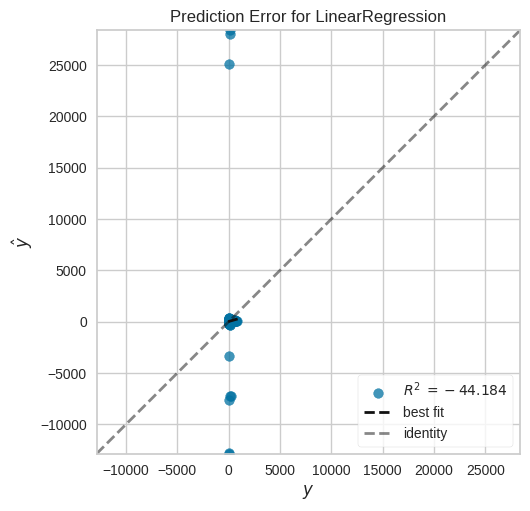

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [40]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [41]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)
final_full_df

/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,379,380,381,382,383,384,385,386,387,388
0,0,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,5,1.00,4,12,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,10,1.00,6,12,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,5,1.00,3,11,-3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,5196,6,23,192,18.00,28963,10,13,12,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15599,5197,6,18,169,19.54,2148,4,5,4,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15600,5198,6,18,17,1.97,105,11,13,5,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,5199,6,59,634,25.80,5469,13,5,4,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


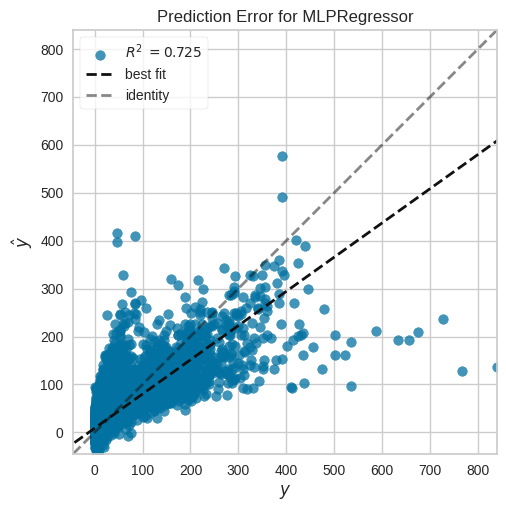

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [43]:
### Linear Regression - Size of the messages
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'size_mess')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-2.0594287333391073

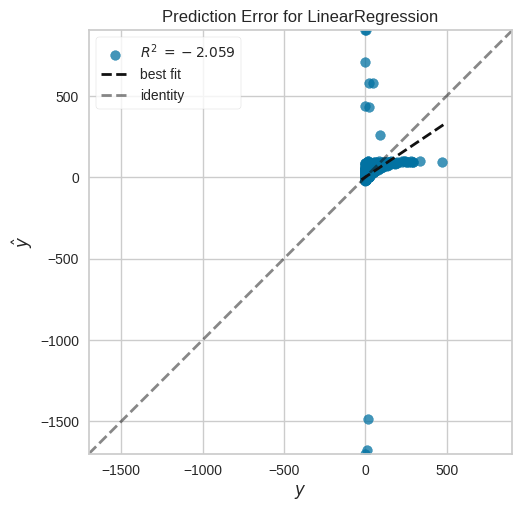

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [44]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)

In [45]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)
final_full_df

/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,379,380,381,382,383,384,385,386,387,388
0,0,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,5,1.00,4,12,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,10,1.00,6,12,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,5,1.00,3,11,-3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,5196,6,23,192,18.00,28963,10,13,12,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15599,5197,6,18,169,19.54,2148,4,5,4,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15600,5198,6,18,17,1.97,105,11,13,5,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,5199,6,59,634,25.80,5469,13,5,4,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


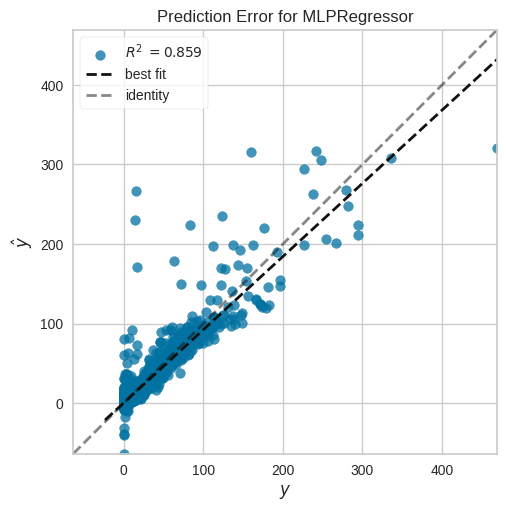

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [46]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [47]:
### Linear Regression - Trace length
f_X_train, f_X_test, f_y_train, f_y_test = prepare_learning_sets(final_full_df, 'trace_len')

regression = LinearRegression()

model = regression.fit(f_X_train, f_y_train)
model.score(f_X_test, f_y_test)

-7.681785643197642

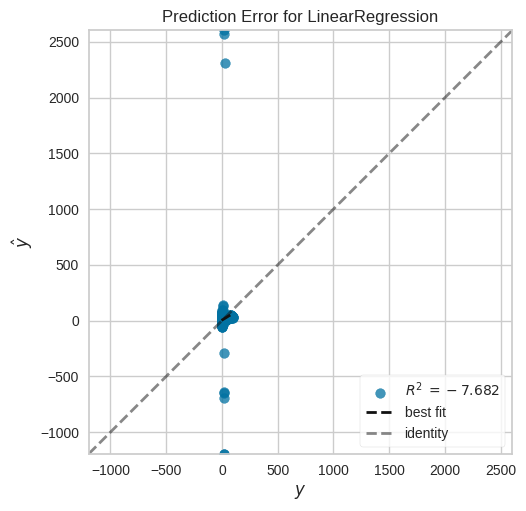

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(model)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure

In [49]:

# sns.regplot(x="total_bill", y="tip", data=tips);
### SVM
# from sklearn import svm
# regr = svm.SVR()
# regr.fit(f_X_train, f_y_train)
# regr.score(f_X_test, f_y_test)
### Neural networks (MLPRegressor)
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000)
regr.fit(f_X_train, f_y_train)
regr.score(f_X_test, f_y_test)


/home/ennio/.pyenv/versions/3.10.8/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,0,1,2,3,...,379,380,381,382,383,384,385,386,387,388
0,0,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,2,5,1.00,4,12,-5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1,3,10,1.00,6,12,-1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,1,2,5,1.00,3,11,-2,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,2,5,1.00,3,11,-3,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15598,5196,6,23,192,18.00,28963,10,13,12,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15599,5197,6,18,169,19.54,2148,4,5,4,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15600,5198,6,18,17,1.97,105,11,13,5,-4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15601,5199,6,59,634,25.80,5469,13,5,4,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
regr.score(f_X_test, f_y_test)

0.9338849019402973

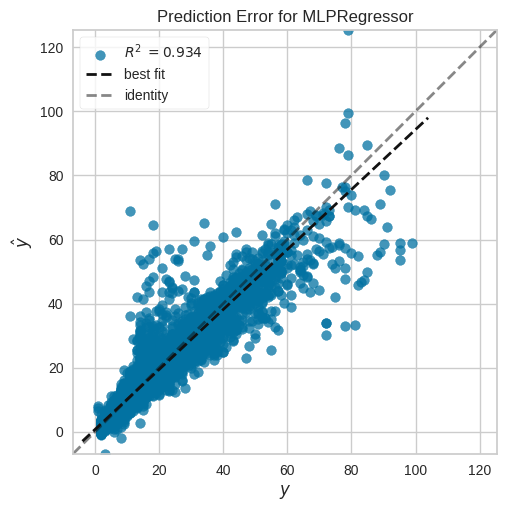

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [50]:

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regr)
visualizer.fit(f_X_train, f_y_train)  # Fit the training data to the visualizer
visualizer.score(f_X_test, f_y_test)  # Evaluate the model on the test data
visualizer.show()  # Finalize and render the figure
